In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score,classification_report,confusion_matrix


file_path = "DATASET.xlsx"

xls = pd.ExcelFile(file_path)
print("✅ Available sheets:", xls.sheet_names)

# Read both sheets
sheet1_df = pd.read_excel(file_path, sheet_name="Sheet1", header=0)
sheet2_df = pd.read_excel(file_path, sheet_name="Sheet2", header=0)
sheet3_df = pd.read_excel(file_path, sheet_name="yearly_rainfall", header=0)

print(sheet1_df.head(10))    #displaying read sheet1,2,3
print(sheet1_df.tail(10))
print(sheet2_df.head(10))



✅ Available sheets: ['Sheet1', 'Sheet2', 'yearly_rainfall']
   Serial No.     Year       Period Months_Covered  Period_Length   District  \
0           1  2023-24  Pre-Monsoon        May–Aug              4     Bokaro   
1           2  2023-24  Pre-Monsoon        May–Aug              4     Chatra   
2           3  2023-24  Pre-Monsoon        May–Aug              4    Deoghar   
3           4  2023-24  Pre-Monsoon        May–Aug              4    Dhanbad   
4           5  2023-24  Pre-Monsoon        May–Aug              4      Dumka   
5           6  2023-24  Pre-Monsoon        May–Aug              4     Garhwa   
6           7  2023-24  Pre-Monsoon        May–Aug              4    Giridih   
7           8  2023-24  Pre-Monsoon        May–Aug              4      Godda   
8           9  2023-24  Pre-Monsoon        May–Aug              4      Gumla   
9          10  2023-24  Pre-Monsoon        May–Aug              4  Hazaribag   

   No_of_HNS  Rise_<2m  Rise_<2m_%  Rise_2-4m  ...  Rise_>4

In [27]:
print(sheet1_df.describe())  #describing df
print(sheet2_df.describe())
print(sheet3_df.describe())

       Serial No.  Period_Length  No_of_HNS   Rise_<2m  Rise_<2m_%  Rise_2-4m  \
count   71.000000      71.000000  71.000000  71.000000   70.000000  71.000000   
mean    36.000000       6.633803  14.450704   1.887324   11.944571   1.676056   
std     20.639767       2.064942   9.804939   2.891116   13.066350   3.421673   
min      1.000000       4.000000   5.000000   0.000000    0.000000   0.000000   
25%     18.500000       4.000000   9.000000   0.000000    0.000000   0.000000   
50%     36.000000       7.000000  11.000000   1.000000    8.010000   0.000000   
75%     53.500000       9.000000  17.500000   2.500000   20.000000   2.000000   
max     71.000000       9.000000  54.000000  19.000000   50.000000  23.000000   

       Rise_2-4m_%   Rise_>4m  Rise_>4m_%   Fall_<2m  Fall_<2m_%  Fall_2-4m  \
count    70.000000  71.000000   70.000000  71.000000   70.000000  71.000000   
mean     12.125000   2.154930   17.201429   3.450704   22.751143   3.436620   
std      18.306066   3.236611   2

In [28]:
sheet1_df=sheet1_df.drop_duplicates()  # deleting duplicates if any
sheet2_df=sheet2_df.drop_duplicates()
sheet3_df=sheet3_df.drop_duplicates()


In [29]:
print(sheet2_df.columns.tolist())     #list all columns of sheet2
sheet2_df["Date"]=pd.to_datetime(sheet2_df["Date"],errors="coerce")


['Serial No.', 'District', 'Date', 'Actual Rainfall (mm)', 'Normal Rainfall (mm)', 'Departure (mm)']


In [30]:
print(sheet1_df['District'].unique())  # to determine spelling mistake in district columns
print(sheet2_df['District'].unique())

correction={"Devghar":"Deoghar"}
sheet1_df['District']=sheet1_df['District'].replace(correction)



['Bokaro' 'Chatra' 'Deoghar' 'Dhanbad' 'Dumka' 'Garhwa' 'Giridih' 'Godda'
 'Gumla' 'Hazaribag' 'Jamtara' 'Khunti' 'Koderma' 'Latehar' 'Lohardaga'
 'Pakur' 'Palamau' 'Paschim Singbhum' 'Purba Singbhum' 'Ramgarh' 'Ranchi'
 'Sahebganj' 'Saraikela' 'Simdega' 'Sahibganj']
['Ranchi' 'Dhanbad' 'East Singhbhum' 'Bokaro' 'West Singhbhum' 'Chatra'
 'Deoghar' 'Dumka' 'Giridih' 'Godda' 'Gumla' 'Hazaribagh' 'Jamtara'
 'Khunti' 'Koderma' 'Latehar' 'Lohardaga' 'Pakur' 'Palamu' 'Ramgarh'
 'Sahibganj' 'Saraikela' 'Simdega' 'Garhwa']


In [31]:
#filling NAN value with mean,replacing negative with zero and rounding off value to 2 decimal point

def clean_df(df):

    for col in df.columns:               # for numeric data
        if df[col].dtype in ['int64','float64']:
            df[col]=pd.to_numeric(df[col],errors="coerce")
            df[col]=df[col].fillna(df[col].mean())
            df.loc[df[col]<0,col]=0
            df[col]=df[col].round(2)
        else:
            df[col]=df[col].fillna(df[col].mode()[0])   #for string data
            df[col]=df[col].astype(str).str.strip().str.lower()  #REMOVING WHITESPACE AND COVERT TO LOWERCASE
    return df


sheet1_cleaned = clean_df(sheet1_df.copy())      #passing sheet iun clean() and storing it
sheet2_cleaned = clean_df(sheet2_df.copy())
sheet3_cleaned = sheet3_df.copy()


#  check category distributions.String/text data converted to numeric
# text to numeric using mapping


year_mapping={
    "2020-21":2021,
    "2021-22":2022,
    "2022-23":2023,
    "2023-24":2024
}

sheet1_cleaned["Year"]=sheet1_cleaned["Year"].map(year_mapping)

period_mapping={
    "pre-monsoon":0,
    "monsoon":1,
    "post-monsoon":2
}

sheet1_cleaned["Period"]=sheet1_cleaned["Period"].map(period_mapping)

#month done through encode since range varies
from sklearn.preprocessing import LabelEncoder

encoder_months=LabelEncoder()
sheet1_cleaned["Months_Covered"]=encoder_months.fit_transform(sheet1_cleaned["Months_Covered"])


combined_districts = pd.concat([
    sheet1_cleaned["District"],
    sheet2_cleaned["District"]
])

encoder = LabelEncoder()
encoder.fit(combined_districts)

# Now encode using the same encoder
sheet1_cleaned["District"] = encoder.transform(sheet1_cleaned["District"])
sheet2_cleaned["District"] = encoder.transform(sheet2_cleaned["District"])

sheet2_cleaned["Date"] = pd.to_datetime(sheet2_cleaned["Date"], errors="coerce")  #extracting year from date
sheet2_cleaned["Year"] = sheet2_cleaned["Date"].dt.year
sheet2_cleaned["Year"] = sheet2_cleaned["Year"].astype(int)

#sheet3
category_mapping={
     "SCANTY":0,
     "DEFICIENT":1,
     "NORMAL":2,
     "EXCESS":3
}
sheet3_cleaned["CATEGORY"]=sheet3_cleaned["CATEGORY"].map(category_mapping)

#year storing as numeric
sheet3_cleaned["YEAR"]=pd.to_numeric(sheet3_df["YEAR"],errors="coerce").astype(int)


sheet3_cleaned=sheet3_cleaned.rename(columns={"ACTUAL (mm)":"Yearly_Actual_mm",
                                    "NORMAL (mm)":"Yearly_Normal_mm",
                                    "DEPARTURE (mm)":"Yearly_Departure_mm",
                                    "CATEGORY":"Yearly_Category"})

print(sheet2_cleaned.head(10))


   Serial No.  District       Date  Actual Rainfall (mm)  \
0           1        23 2024-06-01                 342.1   
1           2         3 2024-06-01                 310.5   
2           3         5 2024-06-01                 365.2   
3           4         0 2024-06-01                 298.7   
4           5        28 2024-06-01                 370.4   
5           6         1 2024-06-01                 285.6   
6           7         2 2024-06-01                 295.3   
7           8         4 2024-06-01                 312.7   
8           9         7 2024-06-01                 301.9   
9          10         8 2024-06-01                 280.4   

   Normal Rainfall (mm)  Departure (mm)  Year  
0                   280            62.1  2024  
1                   275            35.5  2024  
2                   290            75.2  2024  
3                   270            28.7  2024  
4                   295            75.4  2024  
5                   265            20.6  2024  
6  

In [32]:
#feature eng columns are added

#  Sheet1 (Groundwater) 
sheet1_cleaned["Net_GW_Change"] = sheet1_cleaned["Total_Rise"] - sheet1_cleaned["Total_Fall"]

#  Sheet2 (Monthly Rainfall)
sheet2_cleaned["Rainfall_Anomaly"] = sheet2_cleaned["Actual Rainfall (mm)"] - sheet2_cleaned["Normal Rainfall (mm)"]
sheet2_cleaned["Rainfall_Ratio"] = sheet2_cleaned["Actual Rainfall (mm)"] / (sheet2_cleaned["Normal Rainfall (mm)"] + 1e-5)

#  Sheet3 
sheet3_cleaned = sheet3_cleaned.sort_values("YEAR")
sheet3_cleaned["Yearly_Anomaly"] = sheet3_cleaned["Yearly_Actual_mm"] - sheet3_cleaned["Yearly_Normal_mm"]
sheet3_cleaned["Yearly_Ratio"] = sheet3_cleaned["Yearly_Actual_mm"] / (sheet3_cleaned["Yearly_Normal_mm"] + 1e-5)
sheet3_cleaned["Prev_Year_Rainfall"] = sheet3_cleaned["Yearly_Actual_mm"].shift(1)
sheet3_cleaned["Rainfall_3yr_Avg"] = sheet3_cleaned["Yearly_Actual_mm"].rolling(3, min_periods=1).mean()


In [33]:
#merging sheet1 sheet2
rainfall_agg = sheet2_cleaned.groupby(["District", "Year"]).agg({
    "Actual Rainfall (mm)": "mean",
    "Normal Rainfall (mm)": "mean",
    "Departure (mm)": "mean"
}).reset_index()


sheet1_cleaned["Year"] = sheet1_cleaned["Year"].astype(int)
rainfall_agg["Year"] = rainfall_agg["Year"].astype(int)

sheet1_cleaned["District"] = sheet1_cleaned["District"].astype(int)
rainfall_agg["District"] = rainfall_agg["District"].astype(int)

# Merge
merged_df = pd.merge(sheet1_cleaned, rainfall_agg, on=["District", "Year"], how="inner")

# View result
print(merged_df.shape)
print(merged_df.head())

merged_df.to_excel("processed_data.xlsx", index=False)
print("✅ Merge complete. Saved as merged_data.xlsx")



(57, 25)
   Serial No.  Year  Period  Months_Covered  Period_Length  District  \
0           1  2024       0               0              4         0   
1           2  2024       0               0              4         1   
2           3  2024       0               0              4         2   
3           4  2024       0               0              4         3   
4           5  2024       0               0              4         4   

   No_of_HNS  Rise_<2m  Rise_<2m_%  Rise_2-4m  ...  Fall_2-4m  Fall_2-4m_%  \
0         14         4       28.57          4  ...          0         0.00   
1         11         5       45.45          2  ...          1         9.09   
2         10         4       40.00          5  ...          0         0.00   
3         17         6       35.29          5  ...          0         0.00   
4          8         1       12.50          5  ...          0         0.00   

   Fall_>4m  Fall_>4m_%  Total_Rise  Total_Fall  Net_GW_Change  \
0         0        0.00

In [34]:
output_file = "processed_data.xlsx"

# sheet3_cleaned appended at merged_data 
with pd.ExcelWriter(output_file, engine="openpyxl", mode="a", if_sheet_exists="replace") as writer:
    sheet3_cleaned.to_excel(writer, sheet_name="Sheet2", index=False)

print("✅ 'Sheet3_Cleaned' added to 'processed_data.xlsx'")


✅ 'Sheet3_Cleaned' added to 'processed_data.xlsx'


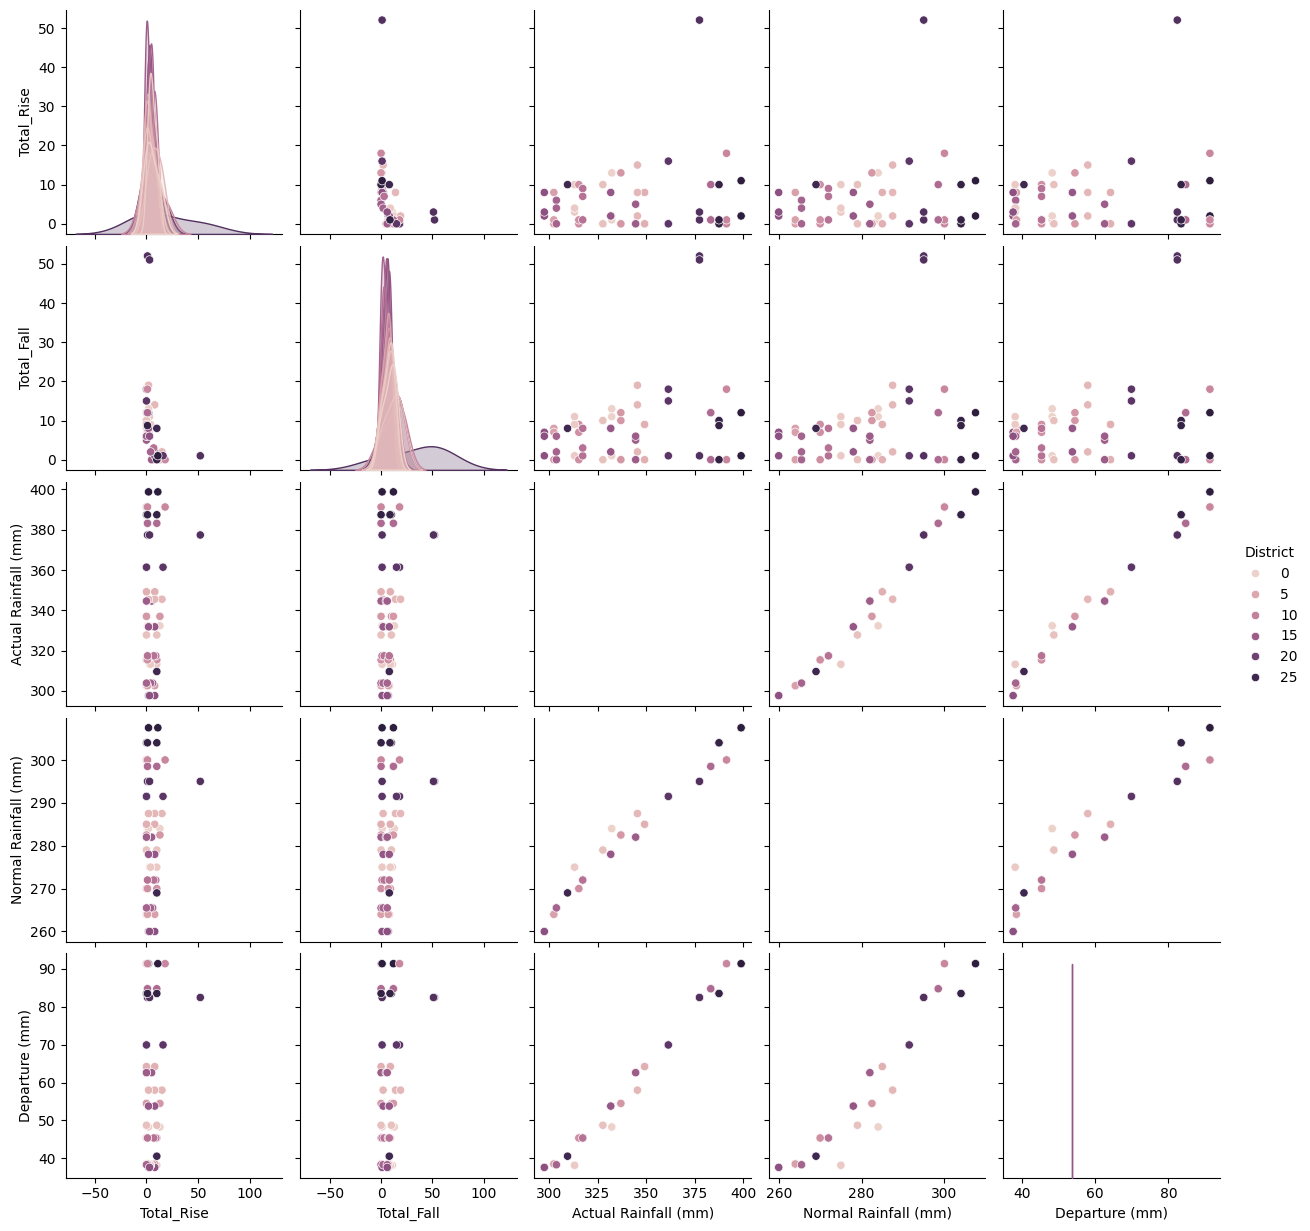

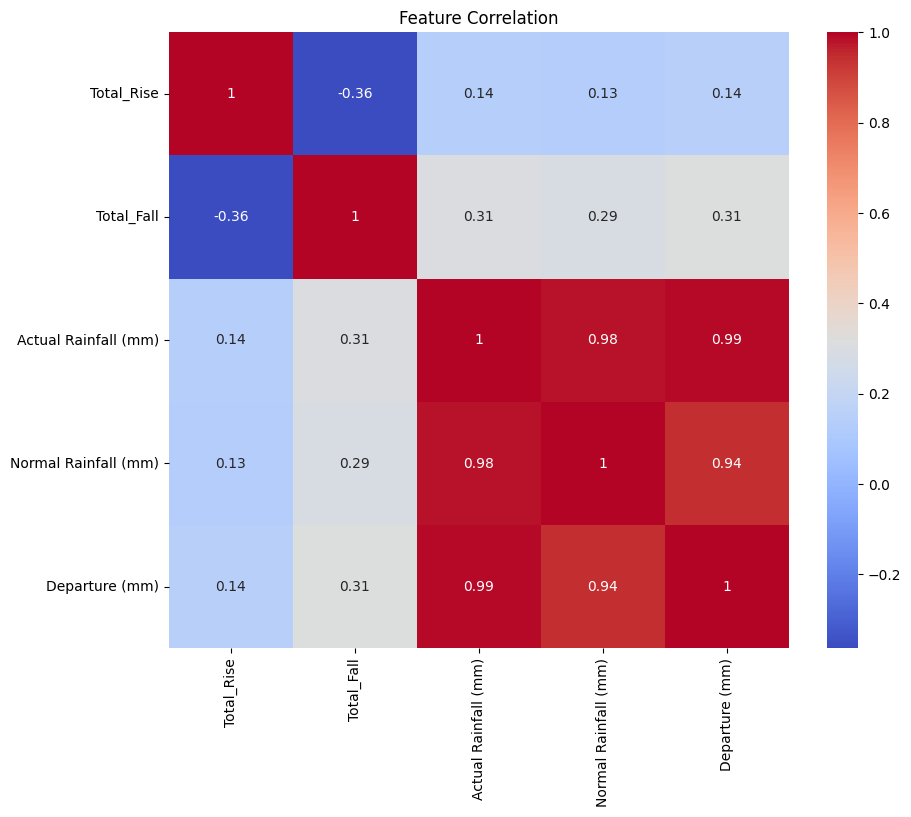

In [35]:
#pairplot and coorelation
# Load dataset
df = pd.read_excel("processed_data.xlsx", sheet_name="Sheet1")

numeric_cols = ['Total_Rise','Total_Fall','Actual Rainfall (mm)','Normal Rainfall (mm)','Departure (mm)']

#pairplot
sns.pairplot(df[numeric_cols+['District']],hue='District') 
plt.show()

#Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols].corr(),annot=True,cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()


===== Regression Metrics =====
Mean Squared Error: 13.7625125
R2 Score: 0.4722232223701731


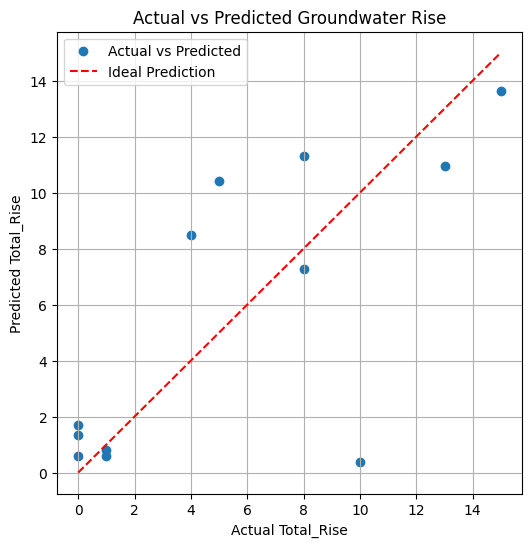

===== Classification Metrics =====
Accuracy: 0.9166666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.86      0.92         7

    accuracy                           0.92        12
   macro avg       0.92      0.93      0.92        12
weighted avg       0.93      0.92      0.92        12

Confusion Matrix:
 [[5 0]
 [1 6]]


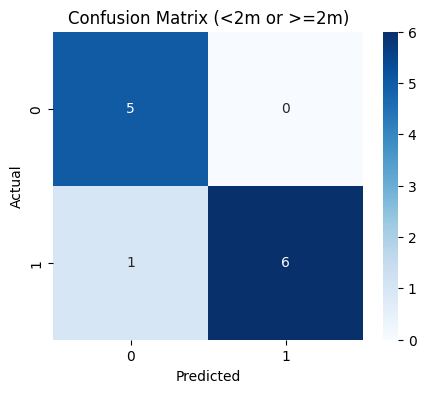

In [36]:
#confusion matrix plotting and actual vs predicted 
df = pd.read_excel("processed_data.xlsx", sheet_name="Sheet1")

numeric_cols = ['Total_Rise','Total_Fall','Actual Rainfall (mm)','Normal Rainfall (mm)','Departure (mm)']


#  Prepare X and Y
X_cols = ['Actual Rainfall (mm)', 'Normal Rainfall (mm)', 'Departure (mm)', 'Total_Fall']
X = df[X_cols]
y = df['Total_Rise']


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Fit Random Forest Regressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train_scaled, y_train)


#  Predict
y_pred = rf.predict(X_test_scaled)

# Evaluate Regression

print("===== Regression Metrics =====")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred,label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--',label='Ideal Prediction')
plt.xlabel("Actual Total_Rise")
plt.ylabel("Predicted Total_Rise")
plt.title("Actual vs Predicted Groundwater Rise")
plt.legend()
plt.grid(True)
plt.show()

#binary classification my rise is continous in data
# Step 8: Binary Classification (<2m or >=2m)
y_test_class = (y_test >= 2).astype(int)       # actual class: rise=> then positive and rise<2 negative
y_pred_class = (y_pred >= 2).astype(int)        #predicted class

print("===== Classification Metrics =====")
print("Accuracy:", accuracy_score(y_test_class, y_pred_class))
print("Classification Report:\n", classification_report(y_test_class, y_pred_class))

cm = confusion_matrix(y_test_class, y_pred_class)
print("Confusion Matrix:\n", cm)

# Confusion matrix heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (<2m or >=2m)")
plt.show()

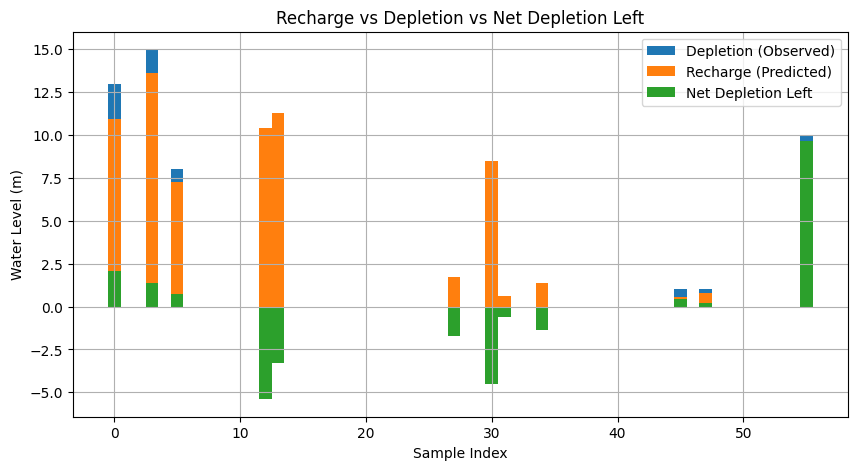

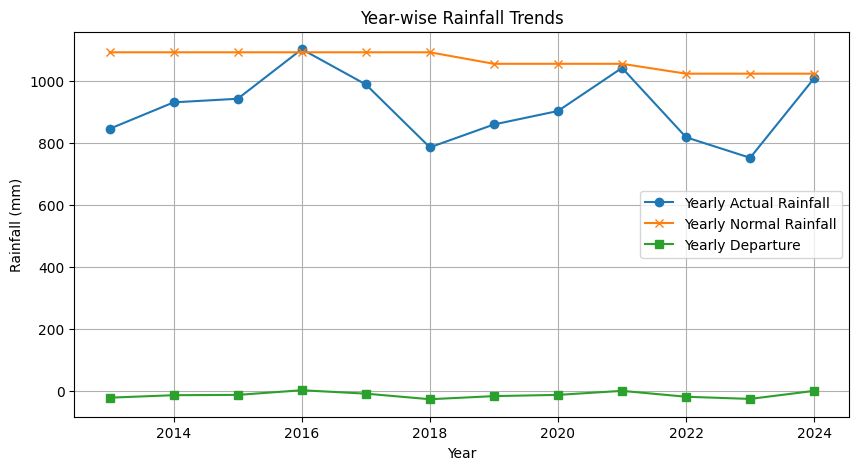

In [37]:
#recharge vs depletion plot
# # Compute Net Depletion Left
df_test = X_test.copy()
df_test['Predicted_Recharge'] = y_pred
df_test['Total_Fall'] = y_test.values  # observed depletion
df_test['Net_Depletion_Left'] = df_test['Total_Fall'] - df_test['Predicted_Recharge']

# Plots
# 1. Recharge (predicted) vs Depletion (observed)
bar_width = 1
plt.figure(figsize=(10,5))
plt.bar(df_test.index, df_test['Total_Fall'],bar_width , label='Depletion (Observed)')
plt.bar(df_test.index, df_test['Predicted_Recharge'],bar_width , label='Recharge (Predicted)')
plt.bar(df_test.index, df_test['Net_Depletion_Left'],bar_width , label='Net Depletion Left')
plt.xlabel("Sample Index")
plt.ylabel("Water Level (m)")
plt.title("Recharge vs Depletion vs Net Depletion Left")
plt.legend()
plt.grid(True)
plt.show()

# 2. Year-wise rainfall from Sheet2
df_yearly = pd.read_excel("processed_data.xlsx", sheet_name="Sheet2")
plt.figure(figsize=(10,5))
plt.plot(df_yearly['YEAR'], df_yearly['Yearly_Actual_mm'], marker='o', label='Yearly Actual Rainfall')
plt.plot(df_yearly['YEAR'], df_yearly['Yearly_Normal_mm'], marker='x', label='Yearly Normal Rainfall')
plt.plot(df_yearly['YEAR'], df_yearly['Yearly_Departure_mm'], marker='s', label='Yearly Departure')
plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.title("Year-wise Rainfall Trends")
plt.legend()
plt.grid(True)
plt.show()

In [38]:
def predict(actual_rainfall,normal_rainfall,departure,total_fall):

    future_data=pd.DataFrame([[actual_rainfall,normal_rainfall,departure,total_fall]],columns=X_cols)
    future_scaled=scaler.transform(future_data)

    rise_pred=float(rf.predict(future_scaled)[0])
    rise_class=1 if rise_pred >=2 else 0

    print("FUTURE PREDICTION")
    print(f"Predicted Groundwater Rise : {rise_pred:.2f}m")
    if rise_class == 1:
        print("Class: >=2m (Good Recharge)")
    else:
        print("Class: <2m (Low Recharge)")
    return rise_pred,rise_class

predict(
    actual_rainfall=220,
    normal_rainfall=380,
    departure=160,
    total_fall=5.0
)

FUTURE PREDICTION
Predicted Groundwater Rise : 1.15m
Class: <2m (Low Recharge)


(1.15, 0)

In [39]:
#Risk Zone

def risk(rise_pred):
    if rise_pred < 1.0:
        return "High Depletion"
    elif rise_pred < 2.0:
        return "Moderate Risk"
    else:
        return "Low Risk / Good Recharge"
    
risk(0.4)  

'High Depletion'

In [40]:
import joblib
joblib.dump(rf,"groundwater_model.pkl")
joblib.dump(scaler,'scaler.pkl')

rf_loaded=joblib.load("groundwater_model.pkl")
scaler_loaded=joblib.load("scaler.pkl")

print('Saved')

Saved
